In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [148]:
df=pd.read_csv(r"C:\Users\Aman\Downloads\House Price\train.csv")

In [149]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [151]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking the missing values and handeling it
* for cateogrical data we are using mode
* for numerical data we are using median (Because there maybe some outliers in our dataset)

In [152]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [153]:
def missing_values_impute(df):
    for i in df:
        if df[i].dtypes=='O':
            mode=df[i].mode()[0]
            df[i].fillna(mode,inplace=True)
        else:
            median=df[i].median()
            df[i].fillna(median,inplace=True)

In [154]:
missing_values_impute(df)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [156]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [157]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

#### seperating the numerical data and cateogrical data

In [12]:
def data_type(df):
    cat_var=[]
    num_var=[]
    for i in df.columns:
        if df[i].dtype=="O":
            print(i,": Object type")
            cat_var.append(i)
        else:
            print(i,": Number Type")
            num_var.append(i)
    df.drop_duplicates()
    return cat_var, num_var

In [13]:
cat_var,num_var=data_type(df)

Id : Number Type
MSSubClass : Number Type
MSZoning : Object type
LotFrontage : Number Type
LotArea : Number Type
Street : Object type
Alley : Object type
LotShape : Object type
LandContour : Object type
Utilities : Object type
LotConfig : Object type
LandSlope : Object type
Neighborhood : Object type
Condition1 : Object type
Condition2 : Object type
BldgType : Object type
HouseStyle : Object type
OverallQual : Number Type
OverallCond : Number Type
YearBuilt : Number Type
YearRemodAdd : Number Type
RoofStyle : Object type
RoofMatl : Object type
Exterior1st : Object type
Exterior2nd : Object type
MasVnrType : Object type
MasVnrArea : Number Type
ExterQual : Object type
ExterCond : Object type
Foundation : Object type
BsmtQual : Object type
BsmtCond : Object type
BsmtExposure : Object type
BsmtFinType1 : Object type
BsmtFinSF1 : Number Type
BsmtFinType2 : Object type
BsmtFinSF2 : Number Type
BsmtUnfSF : Number Type
TotalBsmtSF : Number Type
Heating : Object type
HeatingQC : Object type
Ce

In [14]:
df[cat_var]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [15]:
df[num_var]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


#### Checking Duplicates in the dataset

In [16]:
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### EDA on Numerical data

### Univariate analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [17]:
df[num_var].shape

(1460, 38)

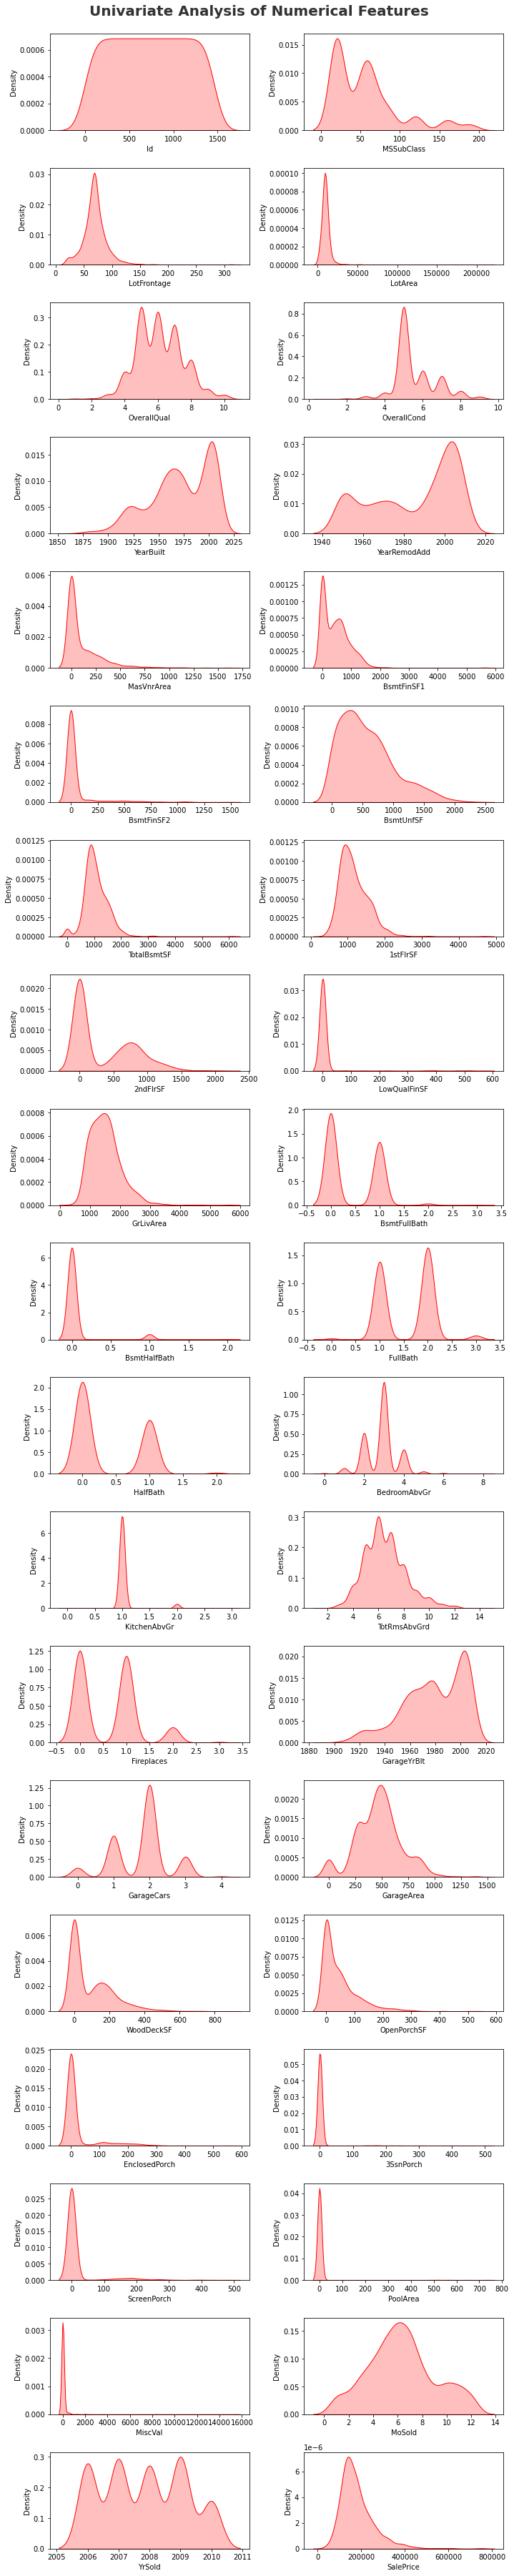

In [18]:
plt.figure(figsize=(10, 50))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_var)):
    plt.subplot(19, 2, i+1)
    sns.kdeplot(x=df[num_var[i]],shade=True, color='r')
    plt.xlabel(num_var[i])
    plt.tight_layout()

### Observations
* MSSubClass, LotFrontage, LotArea, MasVnnArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF,
1stFirSF, LowQualFinSF, GrLivArea, BsmtFullBath, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea,
MiscVal, SalePrice are Log normally distributed.(Right Skewed)

### Bivariate Analysis of Numerical Features with SalesPrice

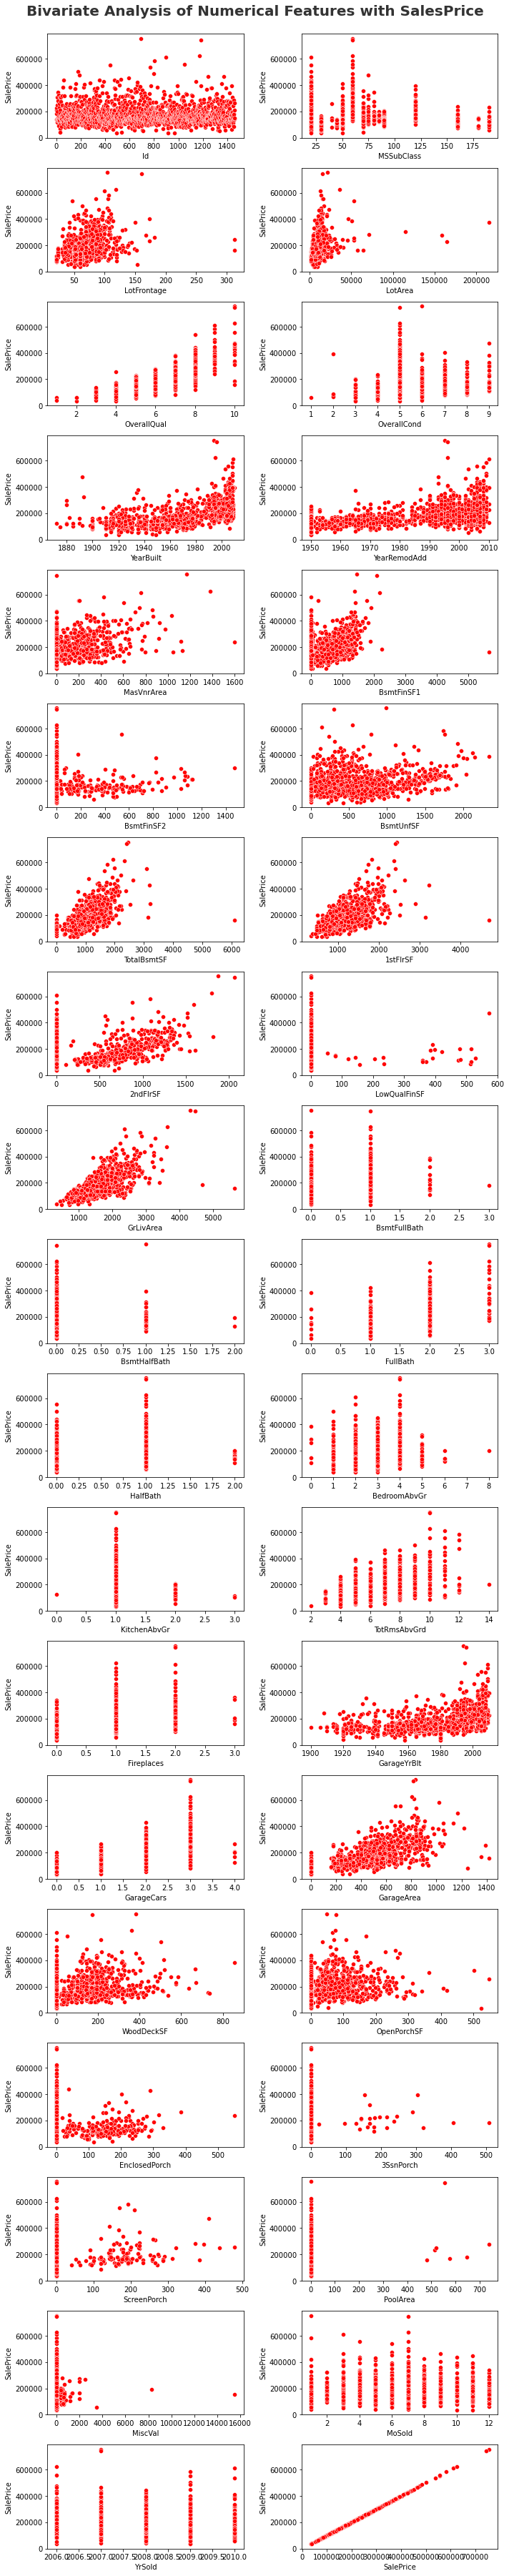

In [19]:
plt.figure(figsize=(10, 50))
plt.suptitle('Bivariate Analysis of Numerical Features with SalesPrice', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_var)):
    plt.subplot(19, 2, i+1)
    sns.scatterplot(x=df[num_var[i]],y=df["SalePrice"],palette="deep",color='r')
    plt.tight_layout()

### Observations 
* Id is randomly scatterd and has no relationship with SalesPrice

### Multivariate analysis 

In [20]:
df[(list(df[num_var]))].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


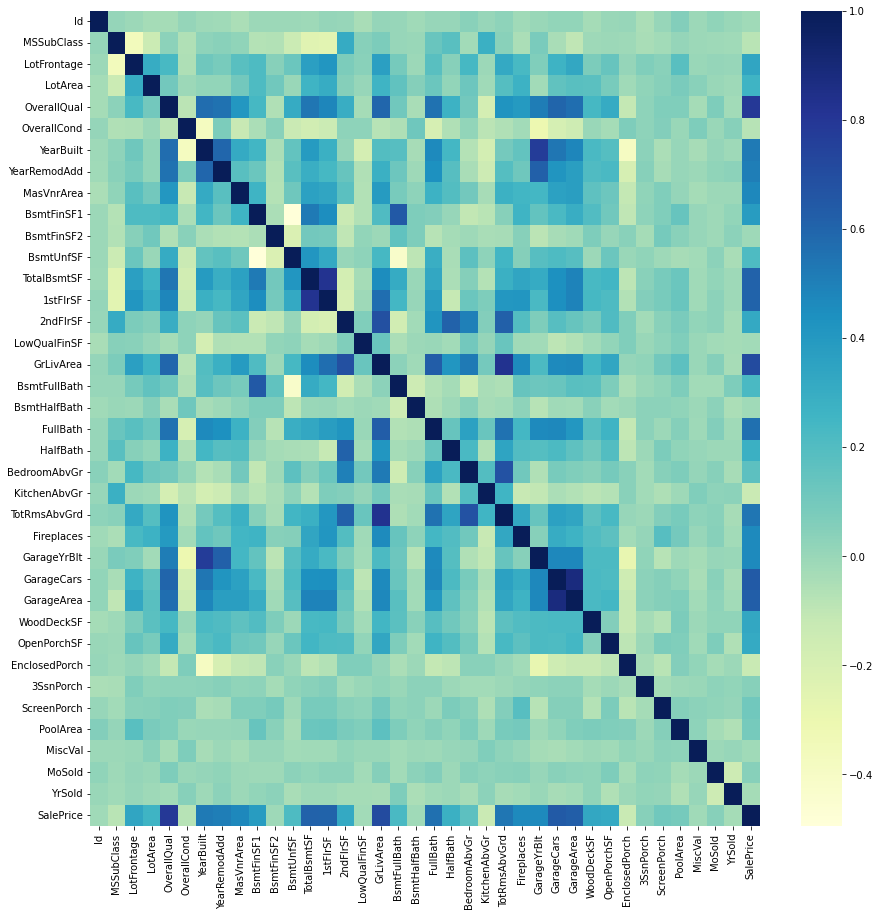

In [21]:
plt.figure(figsize = (15,15))
sns.heatmap(df[num_var].corr(), cmap="YlGnBu")
plt.show()

### EDA on Cateogrical Data

In [22]:
df[cat_var].shape

(1460, 43)

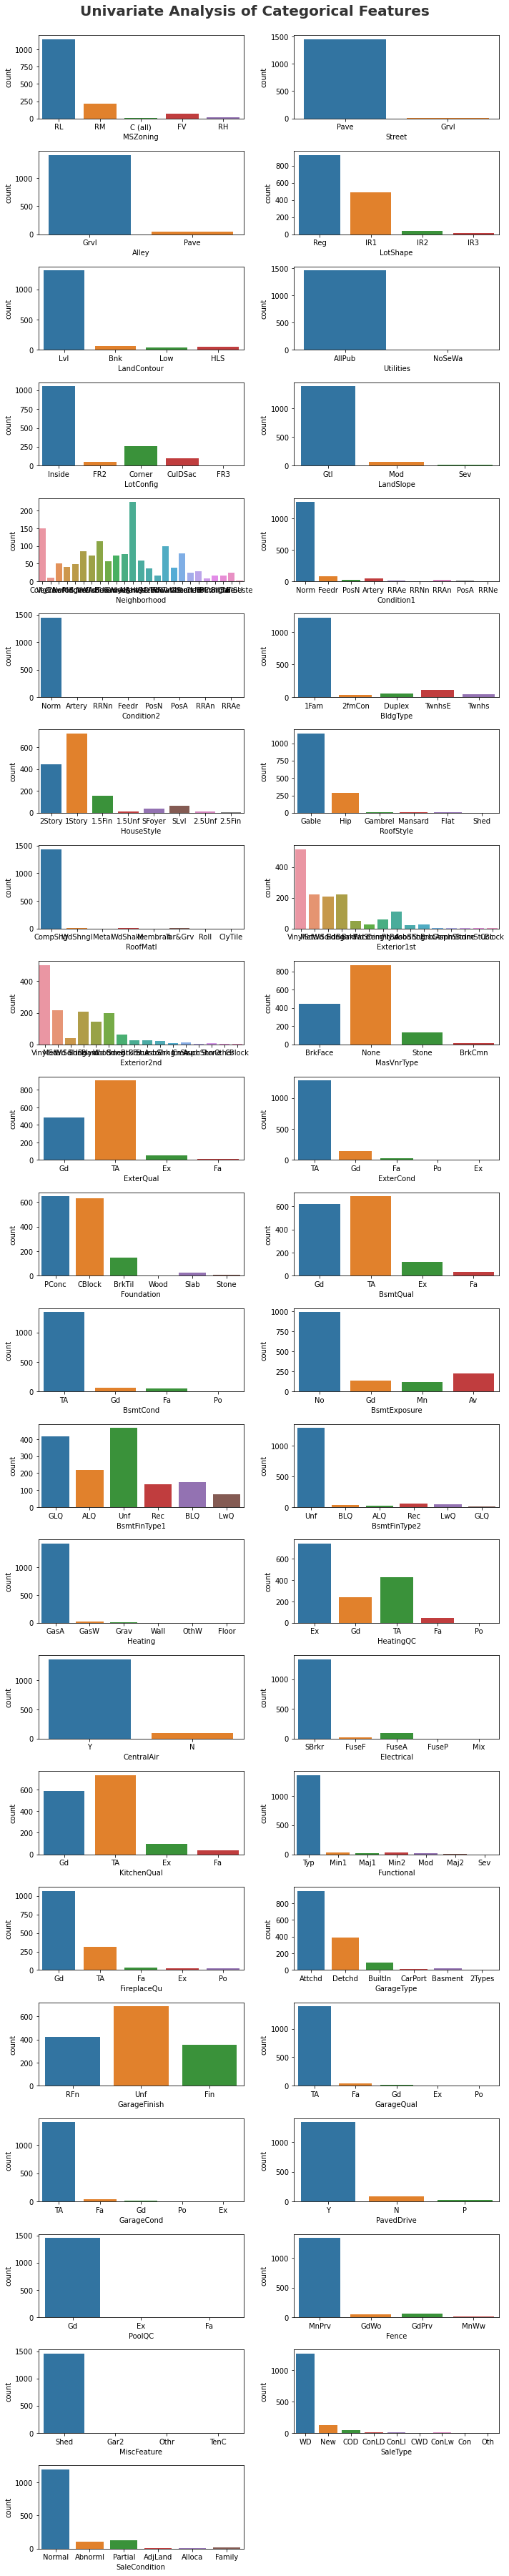

In [23]:
# categorical columns
plt.figure(figsize=(10, 50))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(len(cat_var)):
    plt.subplot(22, 2, i+1)
    sns.countplot(x=df[cat_var[i]])
    plt.xlabel(cat_var[i])
    plt.tight_layout()

In [24]:
# Unique Category in every features
df[cat_var].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

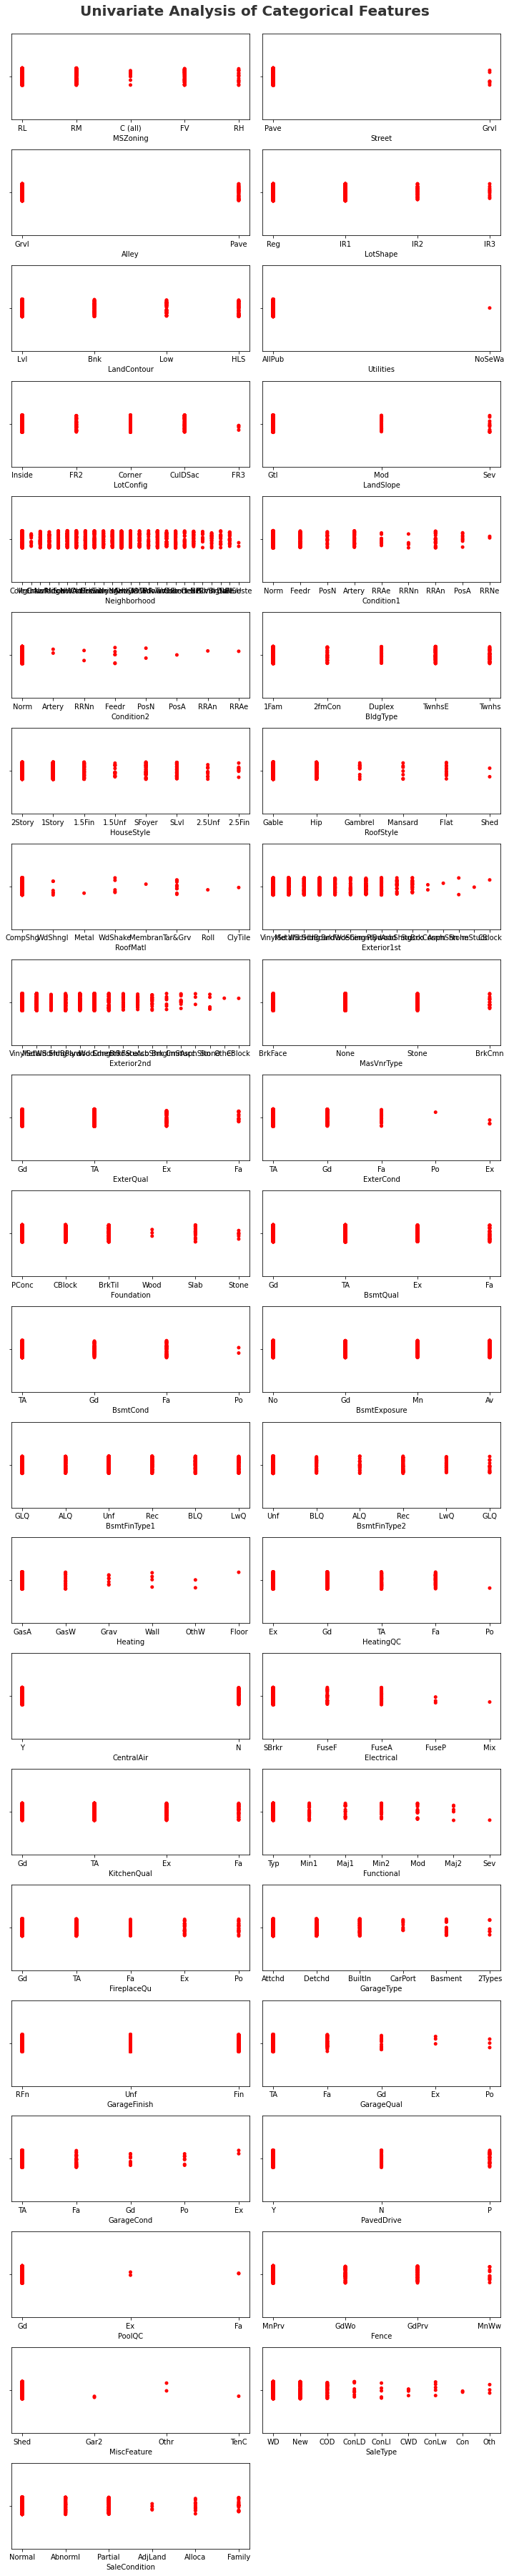

In [25]:
# categorical columns
plt.figure(figsize=(10, 50))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(len(cat_var)):
    plt.subplot(22, 2, i+1)
    sns.stripplot(x=df[cat_var[i]],color='r')
    plt.xlabel(cat_var[i])
    plt.tight_layout()

### Check Multicollinearity for Categorical features

* A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of Categorical columns with Target column i.e SalePrice

In [26]:
def chi2_test(df,column,y):
    from scipy.stats import chi2_contingency
    chi_test = []
    for feature in column:
        if chi2_contingency(pd.crosstab(df[y], df[feature]))[1] < 0.05:
            chi_test.append('Reject Null Hypothesis')
        else:
            chi_test.append('Fail to Reject Null Hypothesis')
    result = pd.DataFrame(data=[column, chi_test]).T
    result.columns = ['Column', 'Hypothesis Result']
    return result

In [27]:
chi2_test(df,cat_var,"SalePrice")

,Column,Hypothesis Result
0,MSZoning,Reject Null Hypothesis
1,Street,Reject Null Hypothesis
2,Alley,Fail to Reject Null Hypothesis
3,LotShape,Reject Null Hypothesis
4,LandContour,Fail to Reject Null Hypothesis
5,Utilities,Fail to Reject Null Hypothesis
6,LotConfig,Reject Null Hypothesis
7,LandSlope,Fail to Reject Null Hypothesis
8,Neighborhood,Reject Null Hypothesis
9,Condition1,Fail to Reject Null Hypothesis


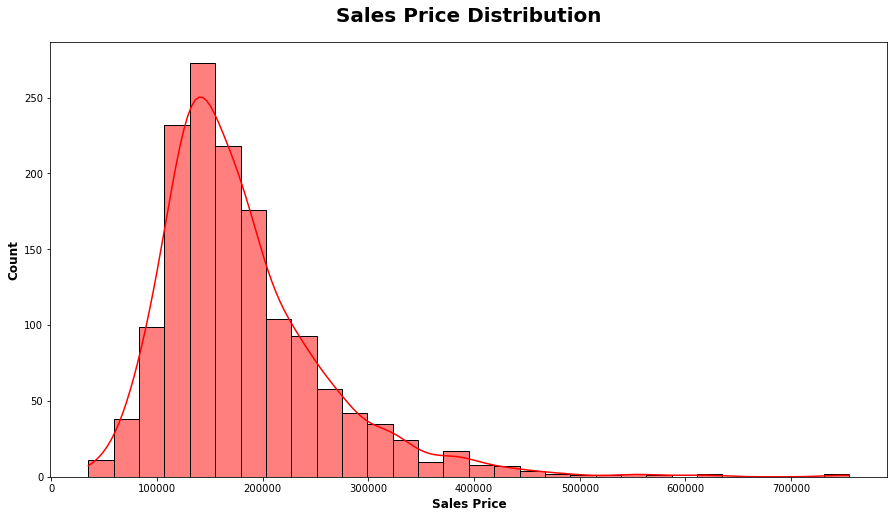

In [28]:
plt.subplots(figsize=(15,8))
sns.histplot(df.SalePrice, bins=30, kde=True, color = 'r')
plt.title("Sales Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Sales Price", weight="bold", fontsize=12)
plt.show()

#### Checking for the outliers 

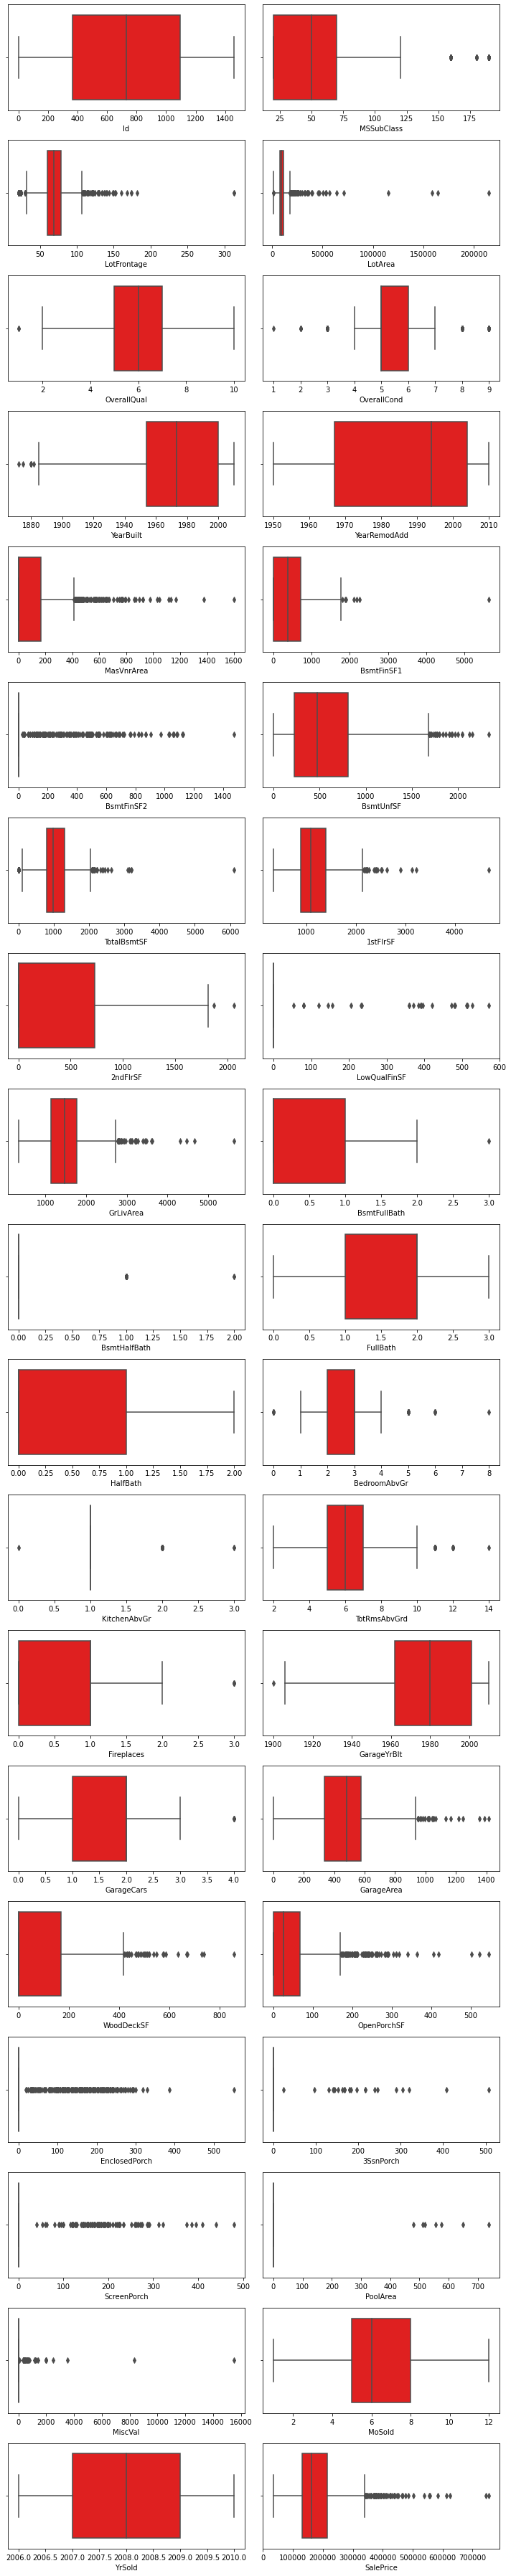

In [29]:
plt.figure(figsize=(10,50))
for i in range(len(num_var)):
    plt.subplot(19, 2, i+1)
    sns.boxplot(df[num_var[i]], color='r')
    plt.tight_layout()

<AxesSubplot:>

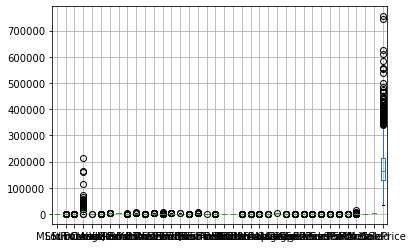

In [30]:
df.boxplot()

# Handelling the ouliers

In [31]:
def outliers_imputation_mild(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*1.5)
    upper_fence=df[column].quantile(0.75)+(IQR*1.5)
    print(column)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence

def outliers_imputation_extreme(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*3)
    upper_fence=df[column].quantile(0.75)+(IQR*3)
    print(column)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence

def outliers_imputation_median(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*3)
    upper_fence=df[column].quantile(0.75)+(IQR*3)
    median=df[column].median()
    print(column)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=median
    df.loc[df[column]>=upper_fence,column]=median

In [32]:
num_var.remove("SalePrice")
num_var

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [33]:
for i in num_var:
    outliers_imputation_mild(df,i)

Id
IQR: 729.5
Lower Fence Id: -728.5
Upper Fence Id: 2189.5
____________________________________________
MSSubClass
IQR: 50.0
Lower Fence MSSubClass: -55.0
Upper Fence MSSubClass: 145.0
____________________________________________
LotFrontage
IQR: 19.0
Lower Fence LotFrontage: 31.5
Upper Fence LotFrontage: 107.5
____________________________________________
LotArea
IQR: 4048.0
Lower Fence LotArea: 1481.5
Upper Fence LotArea: 17673.5
____________________________________________
OverallQual
IQR: 2.0
Lower Fence OverallQual: 2.0
Upper Fence OverallQual: 10.0
____________________________________________
OverallCond
IQR: 1.0
Lower Fence OverallCond: 3.5
Upper Fence OverallCond: 7.5
____________________________________________
YearBuilt
IQR: 46.0
Lower Fence YearBuilt: 1885.0
Upper Fence YearBuilt: 2069.0
____________________________________________
YearRemodAdd
IQR: 37.0
Lower Fence YearRemodAdd: 1911.5
Upper Fence YearRemodAdd: 2059.5
____________________________________________
MasVnrArea


<AxesSubplot:>

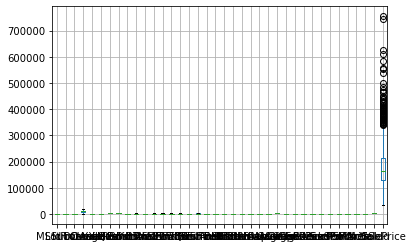

In [34]:
df.boxplot()

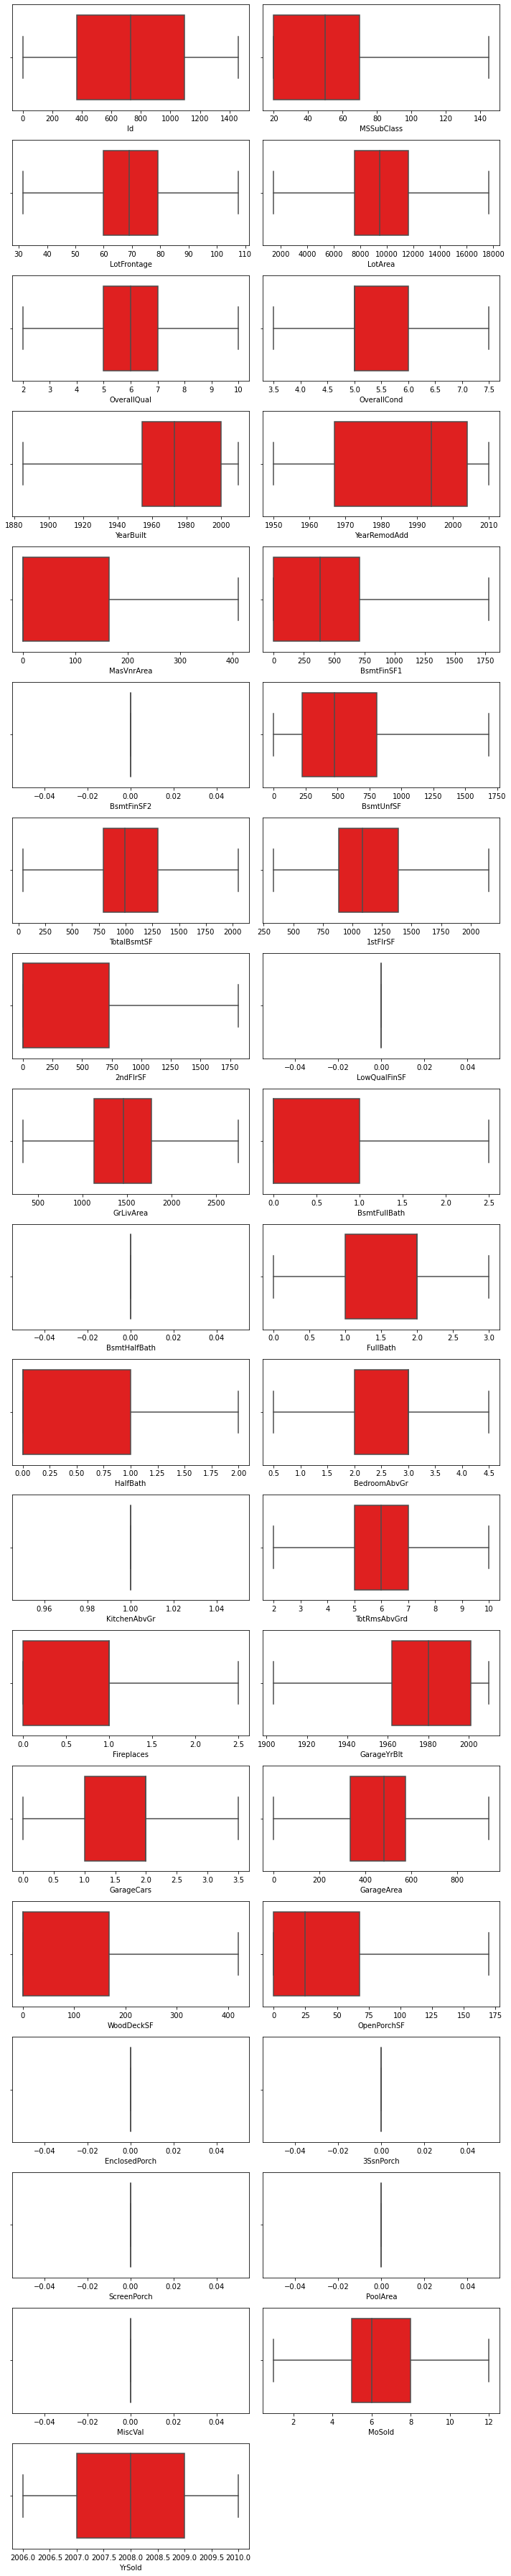

In [35]:
plt.figure(figsize=(10,50))
for i in range(len(num_var)):
    plt.subplot(19, 2, i+1)
    sns.boxplot(df[num_var[i]], color='r')
    plt.tight_layout()

### Encoding the cateogrical data
* One Hot Encoding

In [36]:
df[cat_var].shape

(1460, 43)

In [37]:
df[cat_var].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [38]:
df[cat_var].iloc[:,15].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [39]:
df2=df[cat_var].copy()
df2

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [40]:
df3=pd.get_dummies(df2)
df3

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
df4=df[num_var].copy()
df4

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60,65.0,8450.0,7,5.0,2003,2003.0,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2.0,2008
1,2.0,20,80.0,9600.0,6,7.5,1976,1976.0,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5.0,2007
2,3.0,60,68.0,11250.0,7,5.0,2001,2002.0,162.0,486.0,...,608.0,0,42,0,0,0,0,0,9.0,2008
3,4.0,70,60.0,9550.0,7,5.0,1915,1970.0,0.0,216.0,...,642.0,0,35,0,0,0,0,0,2.0,2006
4,5.0,60,84.0,14260.0,8,5.0,2000,2000.0,350.0,655.0,...,836.0,192,84,0,0,0,0,0,12.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60,62.0,7917.0,6,5.0,1999,2000.0,0.0,0.0,...,460.0,0,40,0,0,0,0,0,8.0,2007
1456,1457.0,20,85.0,13175.0,6,6.0,1978,1988.0,119.0,790.0,...,500.0,349,0,0,0,0,0,0,2.0,2010
1457,1458.0,70,66.0,9042.0,7,7.5,1941,2006.0,0.0,275.0,...,252.0,0,60,0,0,0,0,0,5.0,2010
1458,1459.0,20,68.0,9717.0,5,6.0,1950,1996.0,0.0,49.0,...,240.0,366,0,0,0,0,0,0,4.0,2010


In [44]:
df5=pd.concat([df4,df3],join="outer",axis=1)

In [50]:
df5.drop(columns=["Id"],inplace=True)

In [126]:
# To check multi colinearity
def vif_score(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    arr=scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=['Features','VIF_score'])

In [130]:
x=vif_score(df5)
x

,Features,VIF_score
0,MSSubClass,2.878760e+01
1,LotFrontage,2.766082e+00
2,LotArea,3.812981e+00
3,OverallQual,5.545033e+00
4,OverallCond,2.490486e+00
...,...,...
283,SaleCondition_AdjLand,6.046452e+05
284,SaleCondition_Alloca,1.175292e+07
285,SaleCondition_Family,4.686552e+06
286,SaleCondition_Normal,1.069604e+06


In [132]:
x.VIF_score>10

0       True
1      False
2      False
3      False
4      False
       ...  
283     True
284     True
285     True
286     True
287     True
Name: VIF_score, Length: 288, dtype: bool

### Splitting the data 

In [51]:
X=df5.copy()
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5.0,2003,2003.0,196.0,706.0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600.0,6,7.5,1976,1976.0,0.0,978.0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250.0,7,5.0,2001,2002.0,162.0,486.0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550.0,7,5.0,1915,1970.0,0.0,216.0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260.0,8,5.0,2000,2000.0,350.0,655.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,6,5.0,1999,2000.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175.0,6,6.0,1978,1988.0,119.0,790.0,0,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042.0,7,7.5,1941,2006.0,0.0,275.0,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717.0,5,6.0,1950,1996.0,0.0,49.0,0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
y=df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

#### Train Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=100)

In [55]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,20,60.0,9000.0,4,6.0,1971,1971.0,0.000,616.0,0,...,0,0,0,1,0,0,0,0,1,0
57,60,89.0,11645.0,7,5.0,2004,2004.0,0.000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
780,20,63.0,7875.0,7,5.0,1995,1996.0,38.000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
382,60,79.0,9245.0,7,5.0,2006,2006.0,0.000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1170,80,76.0,9880.0,6,6.0,1977,1977.0,0.000,522.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,60,65.0,15426.0,6,5.0,1997,1997.0,0.000,821.0,0,...,0,0,0,1,0,0,0,0,1,0
200,20,80.0,8546.0,4,5.0,2003,2004.0,0.000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
426,80,69.0,12800.0,7,5.0,1989,1989.0,145.000,1518.0,0,...,0,0,0,1,0,0,0,0,1,0
249,50,69.0,17673.5,6,7.0,1958,2006.0,410.625,697.0,0,...,0,0,0,1,0,0,0,0,1,0


In [56]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1295,20,70.0,8400.0,5,5.0,1968,1968.0,168.0,1016.000,0,...,0,0,0,1,0,0,0,0,1,0
28,20,47.0,16321.0,5,6.0,1957,1997.0,0.0,1277.000,0,...,0,0,0,1,0,0,0,0,1,0
416,60,74.0,7844.0,6,7.0,1978,1978.0,203.0,209.000,0,...,0,0,0,1,0,0,0,0,1,0
493,20,70.0,7931.0,5,6.0,1960,1960.0,0.0,374.000,0,...,0,0,0,1,0,0,0,0,1,0
244,60,69.0,8880.0,7,5.0,1994,2002.0,0.0,695.000,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,60,63.0,8199.0,7,5.0,2005,2005.0,0.0,648.000,0,...,0,0,0,1,0,0,0,0,1,0
53,20,68.0,17673.5,9,5.0,1981,1987.0,0.0,1780.625,0,...,0,0,0,1,0,0,0,0,1,0
350,120,68.0,7820.0,9,5.0,2007,2007.0,362.0,0.000,0,...,0,1,0,0,0,0,0,0,0,1
79,50,60.0,10440.0,5,6.0,1910,1981.0,0.0,0.000,0,...,0,0,0,1,0,0,0,0,1,0


In [159]:
scale=MinMaxScaler(feature_range=(-1,1))

In [160]:
X_train_scale=pd.DataFrame(scale.fit_transform(X_train))

In [161]:
X_test_scale=pd.DataFrame(scale.fit_transform(X_test))

In [162]:
X_train_scale

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-1.00,0.013158,-0.145442,-0.25,-0.25,0.328,-0.400000,-0.181735,0.141172,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,-1.00,-0.592105,0.832942,-0.25,0.25,0.152,0.566667,-1.000000,0.434328,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
2,-0.36,0.118421,-0.214118,0.00,0.75,0.488,-0.066667,-0.011263,-0.765251,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
3,-1.00,0.013158,-0.203372,-0.25,0.25,0.200,-0.666667,-1.000000,-0.579923,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
4,-0.36,-0.013158,-0.086154,0.25,-0.25,0.744,0.733333,-1.000000,-0.219375,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.36,-0.171053,-0.170269,0.25,-0.25,0.920,0.833333,-1.000000,-0.272166,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
1383,-1.00,-0.039474,1.000000,0.75,-0.25,0.536,0.233333,-1.000000,1.000000,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
1384,0.60,-0.039474,-0.217083,0.75,-0.25,0.952,0.900000,0.763166,-1.000000,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1385,-0.52,-0.250000,0.106534,-0.25,0.25,-0.600,0.033333,-1.000000,-1.000000,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [163]:
lin_reg=LinearRegression()

In [164]:
lin_reg.fit(X_train_scale,y_train)

LinearRegression()

In [165]:
lin_reg.coef_

array([-4.48952777e+03, -7.14232461e+02,  1.19748704e+04,  2.37359762e+04,
        1.33128934e+04,  2.34367352e+04,  3.43104914e+03,  1.67360823e+03,
        2.11838228e+04,  7.54123979e+16,  3.83379875e+03,  8.70765142e+03,
        8.78365228e+04,  9.18323194e+04,  2.13384475e+16, -5.27056837e+04,
        3.44705944e+03,  3.81787295e+16,  6.36054438e+03,  8.56944840e+02,
       -6.27324148e+03,  2.05353505e+16,  5.01455502e+03,  5.66868023e+03,
        2.65871520e+03,  3.19884741e+03,  6.57812780e+03,  2.96314740e+03,
        2.75937738e+03, -1.71325517e+16, -3.23915248e+16, -3.47873993e+16,
        1.94907231e+16, -8.16981459e+15, -2.41851625e+03, -9.51257722e+02,
       -1.72501940e+17, -1.72501940e+17, -1.72501940e+17, -1.72501940e+17,
       -1.72501940e+17, -1.14132936e+16, -1.14132936e+16,  3.56908183e+16,
        3.56908183e+16, -1.35708710e+17, -1.35708710e+17, -1.35708710e+17,
       -1.35708710e+17, -3.77490951e+16, -3.77490951e+16, -3.77490951e+16,
       -3.77490951e+16,  

In [166]:
lin_reg.intercept_

1.0037760860866721e+18

In [167]:
pred=lin_reg.predict(X_test)

In [168]:
lin_reg.score(X_test,y_test)

-2.4257465573974388e+26

In [169]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,pred))
print('Mean squared error is:', metrics.mean_squared_error(y_test,pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean abolute error is: 1.1215193890249498e+18
Mean squared error is: 1.2578171926799009e+36
Root mean squared error is: 1.1215244949085601e+18


In [172]:
def adjusted_r2(x,y):
    r2=lin_reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [173]:
adjusted_r2(X_test_scale,y_test)

1.3068382794320575e+22